# Perceptron

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
data = pd.DataFrame(iris['data'], columns = ['petal length', 'petal width', 'sepal length', 'sepal width'])
data['species'] = iris['target']
data['species'] = data['species'].apply(lambda x: iris['target_names'][x])
data

,petal length,petal width,sepal length,sepal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal length  150 non-null    float64
 1   petal width   150 non-null    float64
 2   sepal length  150 non-null    float64
 3   sepal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


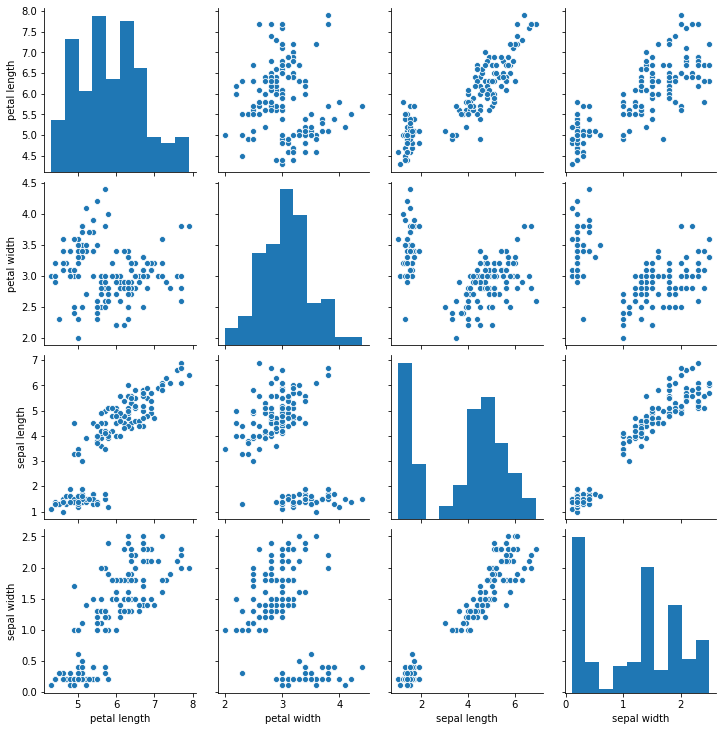

In [5]:
sns.pairplot(data)

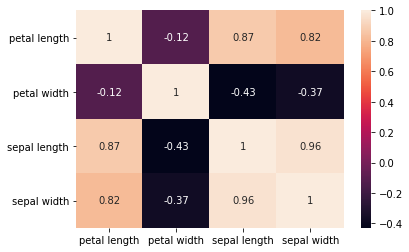

In [6]:
sns.heatmap(data.corr(), annot = True)

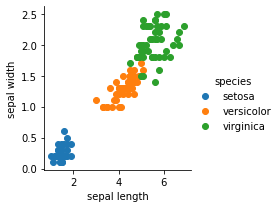

In [7]:
sns.FacetGrid(data, hue = 'species').map(plt.scatter, 'sepal length', 'sepal width').add_legend()
plt.show()

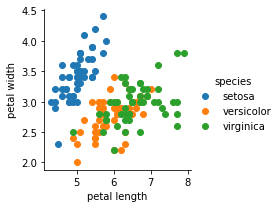

In [8]:
sns.FacetGrid(data, hue = 'species').map(plt.scatter, 'petal length', 'petal width').add_legend()
plt.show()

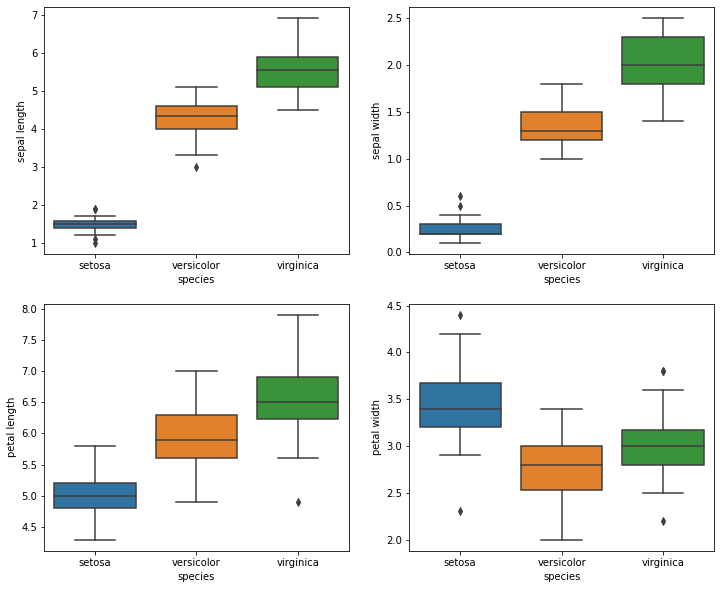

In [9]:
plt.figure(figsize = (12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x = 'species', y = 'sepal length', data = data)
plt.subplot(2, 2, 2)
sns.boxplot(x = 'species', y = 'sepal width', data = data)
plt.subplot(2, 2, 3)
sns.boxplot(x = 'species', y = 'petal length', data = data)
plt.subplot(2, 2, 4)
sns.boxplot(x = 'species', y = 'petal width', data = data)

There are three types of iris. Each time, we pick two types of them to run.

In [10]:
X = iris.data[:100]
Y = iris.target[:100]
Y = np.where(Y == 1, 1, -1)

In [11]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.4)

In [12]:
def evaluation(x, y, w, b):
    p = np.dot(x, w) + b
    pred = np.where(p <= 0, -1, 1)
    correct_count = (pred == y).sum()
    total_count = x.shape[0]
    accuracy = 1.0 * correct_count / total_count
    return accuracy

In [13]:
def perceptron(x, y, eta_learning_rate, n_epoch):
    w = np.zeros(x.shape[1])
    b = 0
    errors = []
    for i in range(n_epoch):
        error = 0
        for xi, yi in zip(x, y):
            p = np.dot(xi, w) + b
            if p * yi <= 0:
                delta_w = yi * xi * eta_learning_rate
                delta_b = yi * eta_learning_rate
                w = w + delta_w
                b = b + delta_b
                error = error + 1

        errors.append(error)
        accuracy = evaluation(testX, testY, w, b)
        info = '[{0}] Training_Error: {error_count:d} Accuracy: {accuracy_percentage:.4f}'.format(i, error_count = error, accuracy_percentage = accuracy)
        print(info)
    return w, b

In [14]:
w, b = perceptron(trainX, trainY, 0.01, 10)

[0] Training_Error: 9 Accuracy: 1.0000
[1] Training_Error: 0 Accuracy: 1.0000
[2] Training_Error: 0 Accuracy: 1.0000
[3] Training_Error: 0 Accuracy: 1.0000
[4] Training_Error: 0 Accuracy: 1.0000
[5] Training_Error: 0 Accuracy: 1.0000
[6] Training_Error: 0 Accuracy: 1.0000
[7] Training_Error: 0 Accuracy: 1.0000
[8] Training_Error: 0 Accuracy: 1.0000
[9] Training_Error: 0 Accuracy: 1.0000
